# Demo Geolocation
- https://latitudelongitude.org/vn/

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# Câu 1: Đọc file dữ liệu province data.geojson (ranh giới các tỉnh thành ở VN) và quan sát dữ liệu
gdf = gpd.read_file('province_data.geojson')
gdf.head()

gid  code          ten_tinh  \
0    1  AD01          An Giang   
1    2  AD01  Bà Rịa -Vũng Tàu   
2    3  AD01         Bắc Giang   
3    4  AD01           Bắc Kạn   
4    5  AD01          Bạc Liêu   

                                            geometry  
0  MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...  
1  MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...  
2  MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...  
3  MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...  
4  MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...

In [4]:
gdf.shape

(63, 4)

In [5]:
# Đọc tập tin dữ liệu province data.xlsx cho biết dân số các tỉnh thành, khu vực
data = pd.read_excel('province_data.xlsx')
data.head()

province  id      value    area     pop  pop.area       lat       long
0   An Giang   1  29.757870  3536.7  2155.3       609       NaN        NaN
1   Bạc Liêu   2  57.377857  2468.7   876.8       355   9.29414  105.72776
2  Bắc Giang   3  53.084348  3849.7  1593.2       414  21.27307  106.19460
3    Bắc Kạn   4  23.989343  4859.4   303.1        62  22.14701  105.83481
4   Bắc Ninh   5  24.026561   822.7  1114.0      1354  21.18608  106.07631

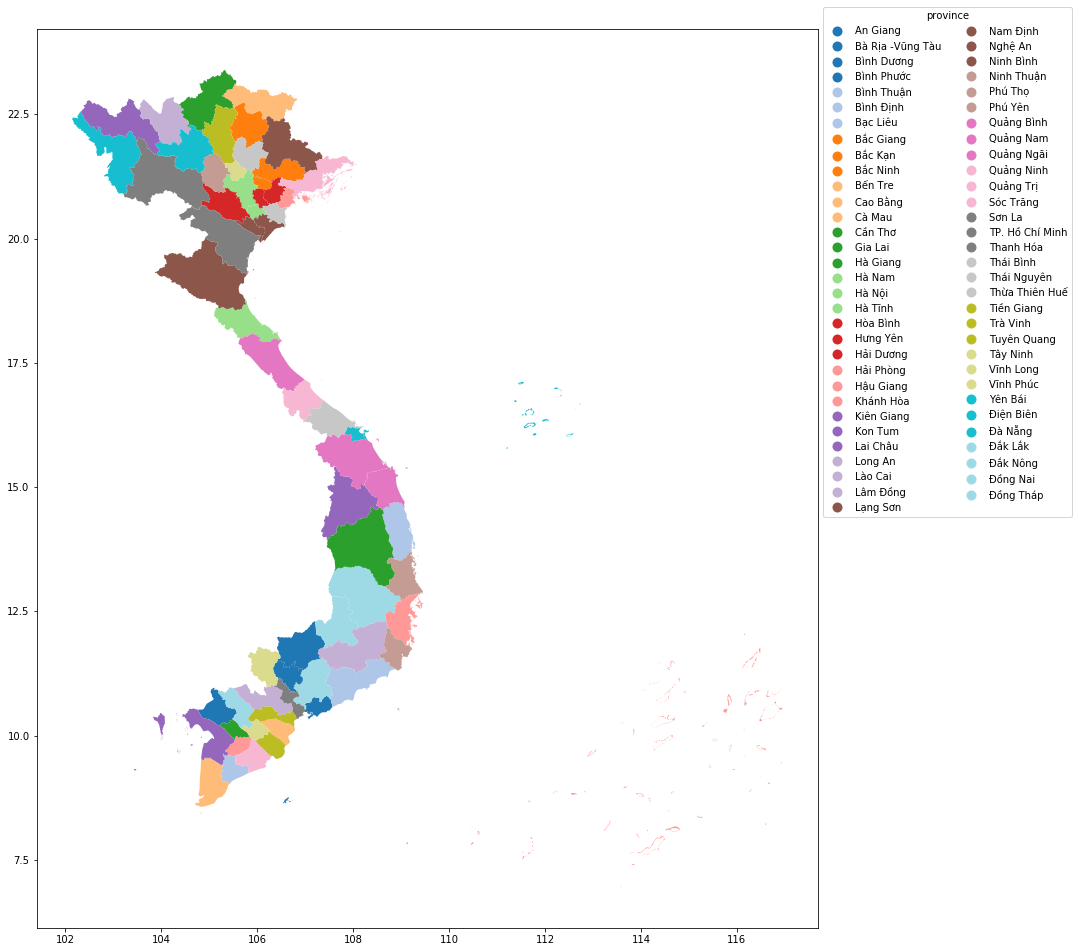

In [6]:
# Hiển thị bản đồ Việt Nam
lgnd_kwds = {'title':'province','loc':'upper left','bbox_to_anchor':(1,1.03),'ncol':2}
gdf.plot(column='ten_tinh',figsize=(14,24),cmap='tab20',legend_kwds=lgnd_kwds,legend=True)

In [7]:
# Tạo dataframe df chứa dữ liệu của province và kết hợp thêm dữ liệu pop của data
df1 = pd.DataFrame(gdf.iloc[:,:].values, columns = list(gdf.columns.values)[:] )
df1.head()

gid  code          ten_tinh  \
0   1  AD01          An Giang   
1   2  AD01  Bà Rịa -Vũng Tàu   
2   3  AD01         Bắc Giang   
3   4  AD01           Bắc Kạn   
4   5  AD01          Bạc Liêu   

                                            geometry  
0  (POLYGON ((105.115241874 10.95566089600002, 10...  
1  (POLYGON ((106.081096978 8.577536049000043, 10...  
2  (POLYGON ((106.165424121 21.62022349900008, 10...  
3  (POLYGON ((105.744201095 22.73519466500007, 10...  
4  (POLYGON ((105.3259085210001 9.600039486000076...

In [8]:
df2 = data[['province','pop']]
df2.head()

province     pop
0   An Giang  2155.3
1   Bạc Liêu   876.8
2  Bắc Giang  1593.2
3    Bắc Kạn   303.1
4   Bắc Ninh  1114.0

In [9]:
df = pd.concat([df1,df2],axis=1,join='inner')
df.head()

gid  code          ten_tinh  \
0   1  AD01          An Giang   
1   2  AD01  Bà Rịa -Vũng Tàu   
2   3  AD01         Bắc Giang   
3   4  AD01           Bắc Kạn   
4   5  AD01          Bạc Liêu   

                                            geometry   province     pop  
0  (POLYGON ((105.115241874 10.95566089600002, 10...   An Giang  2155.3  
1  (POLYGON ((106.081096978 8.577536049000043, 10...   Bạc Liêu   876.8  
2  (POLYGON ((106.165424121 21.62022349900008, 10...  Bắc Giang  1593.2  
3  (POLYGON ((105.744201095 22.73519466500007, 10...    Bắc Kạn   303.1  
4  (POLYGON ((105.3259085210001 9.600039486000076...   Bắc Ninh  1114.0

In [10]:
import folium

In [20]:
#vn_geo = r'province_data.geojson'
vn_map = folium.Map(location=[13.2904027, 108.4265113], zoom_start=6)
# Hiển thị biểu đồ dân số của Việt Nam
folium.Choropleth(
    geo_data=gdf,
    data=df,
    columns=['ten_tinh', 'pop'],
    key_on='feature.properties.ten_tinh',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='population'
).add_to(vn_map)

vn_map

In [12]:
gdf['province'] = df['province']
gdf['pop'] = df['pop']
gdf.head()

gid  code          ten_tinh  \
0    1  AD01          An Giang   
1    2  AD01  Bà Rịa -Vũng Tàu   
2    3  AD01         Bắc Giang   
3    4  AD01           Bắc Kạn   
4    5  AD01          Bạc Liêu   

                                            geometry   province     pop  
0  MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...   An Giang  2155.3  
1  MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...   Bạc Liêu   876.8  
2  MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...  Bắc Giang  1593.2  
3  MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...    Bắc Kạn   303.1  
4  MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...   Bắc Ninh  1114.0